In [3]:
%load_ext autoreload
%autoreload 2

# Imports

In [4]:
import shutil
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import data.generate as gen
import data.visualise as vis

# Graph generation

In [14]:
# generate a 1000 graphs
# 50 grid, 50 star, 900 random
graphs = gen.generate_graphs(num_random=900, num_star=50, num_grid=50)

Generating random graphs finished!
Generating star graphs finished!
Generating grid graphs finished!


In [54]:
# zip the graph data
shutil.make_archive('../data/graphs', 'zip', gen.GRAPH_FOLDER)

'c:\\bme\\onlab\\code\\graph-visualisation\\data\\graphs.zip'

# Position calculation

In [39]:
# get all random graphs
random_graphs = gen.read_all_random_graphs()
len(random_graphs)

900

In [40]:
# calculate positions for the first 100
for G in random_graphs[:100]:
    pos = vis.fruchterman_reingold(G)
    vis.add_final_pos(G,"spring",pos)

In [41]:
# calculate positions for the next 100
for G in random_graphs[100:200]:
    pos = vis.fruchterman_reingold(G)
    vis.add_final_pos(G,"spring",pos)

In [42]:
# calculate positions for the next 200
for G in random_graphs[200:400]:
    pos = vis.fruchterman_reingold(G)
    vis.add_final_pos(G,"spring",pos)

In [43]:
# calculate positions for the next 200
for G in random_graphs[400:600]:
    pos = vis.fruchterman_reingold(G)
    vis.add_final_pos(G,"spring",pos)

In [44]:
# calculate positions for the next 200
for G in random_graphs[600:800]:
    pos = vis.fruchterman_reingold(G)
    vis.add_final_pos(G,"spring",pos)

In [46]:
# calculate positions for the last 100
for G in random_graphs[800:]:
    pos = vis.fruchterman_reingold(G)
    vis.add_final_pos(G,"spring",pos)

In [55]:
# read the star graphs for position calculations
star_graphs = gen.read_all_star_graphs()
len(star_graphs)

50

In [56]:
# calculate positions for star graphs
for G in star_graphs:
    pos = vis.fruchterman_reingold(G)
    vis.add_final_pos(G,"spring",pos)

In [57]:
# zip the position data data
shutil.make_archive('../data/spring_positions', 'zip', gen.POS_FOLDER)

'c:\\bme\\onlab\\code\\graph-visualisation\\data\\spring_positions.zip'

# Dataset Exploration

In [8]:
# read all_graphs
graphs = gen.read_all_graphs()

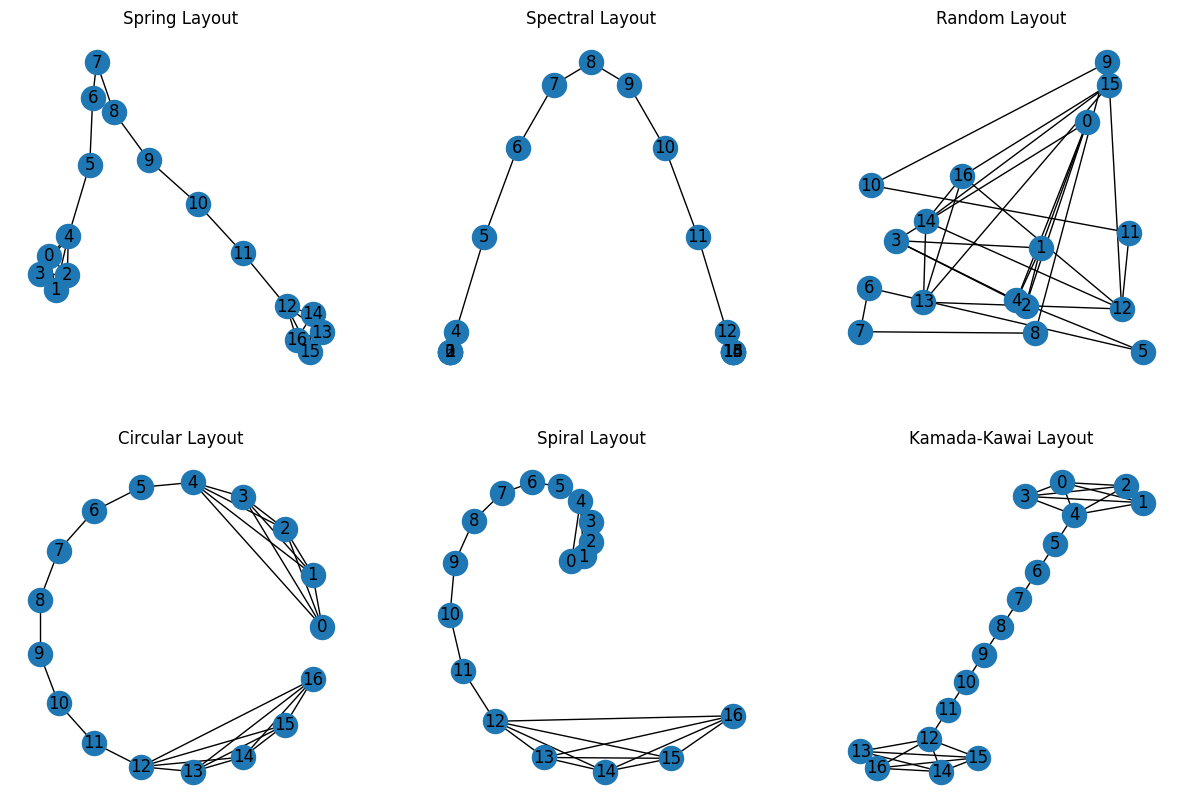

In [ ]:
# visualise a graph with 6 different algorithms
# Create a sample graph
G = nx.barbell_graph(5, 7)

# Define the layout for each visualization method
spring_pos = nx.spring_layout(G)
spectral_pos = nx.spectral_layout(G)
circular_pos = nx.circular_layout(G)
random_pos = nx.random_layout(G)
kk_pos = nx.kamada_kawai_layout(G)
spiral_pos = nx.spiral_layout(G)

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Draw the graph with spring layout
ax1 = axes[0,0]
ax1.set_title('Spring Layout')
nx.draw(G, pos=spring_pos, with_labels=True, ax=ax1)

# Draw the graph with spectral layout
ax2 = axes[0,1]
ax2.set_title('Spectral Layout')
nx.draw(G, pos=spectral_pos, with_labels=True, ax=ax2)

# Draw the graph with random layout
ax3 = axes[0,2]
ax3.set_title('Random Layout')
nx.draw(G, pos=random_pos, with_labels=True, ax=ax3)

# Draw the graph with circular layout
ax4 = axes[1,0]
ax4.set_title('Circular Layout')
nx.draw(G, pos=circular_pos, with_labels=True, ax=ax4)

# Draw the graph with planar layout
ax5 = axes[1,1]
ax5.set_title('Spiral Layout')
nx.draw(G, pos=spiral_pos, with_labels=True, ax=ax5)

# Draw the graph with kamada-kawai layout
ax6 = axes[1,2]
ax6.set_title('Kamada-Kawai Layout')
nx.draw(G, pos=kk_pos, with_labels=True, ax=ax6)

# save the figure
plt.savefig("../imgs/barbell_graph_plots.jpg")

# Display the plot
plt.show()

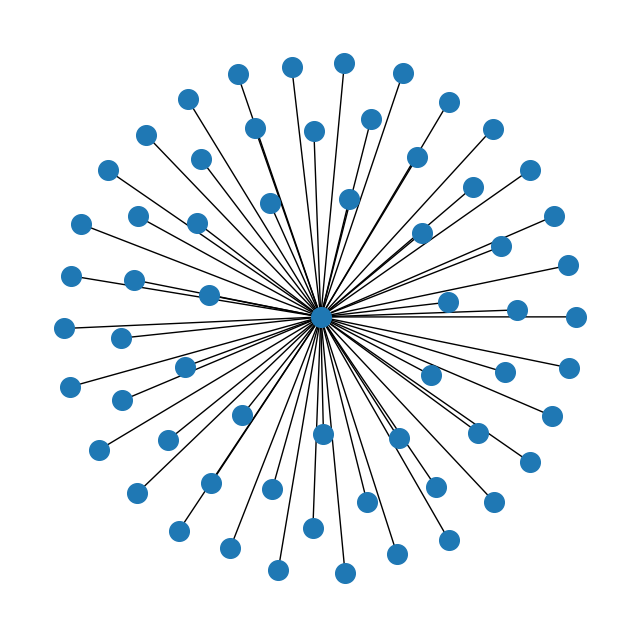

In [ ]:
# draw a star graph
g = gen.graph_from_csv("star_903.csv")
vis.visualise(g, file="../imgs/star.jpg")
plt.show()

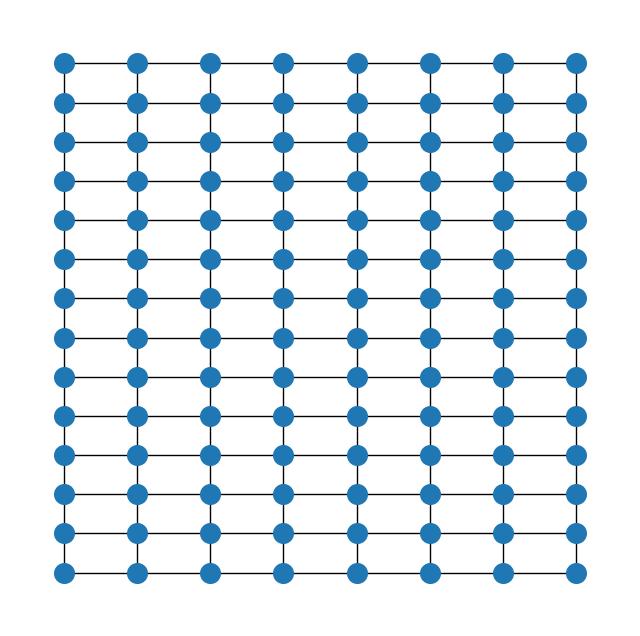

In [ ]:
# draw a grid graph
g = gen.graph_from_csv("grid_995.csv")
vis.visualise(g,file="../imgs/grid.jpg")
plt.show()

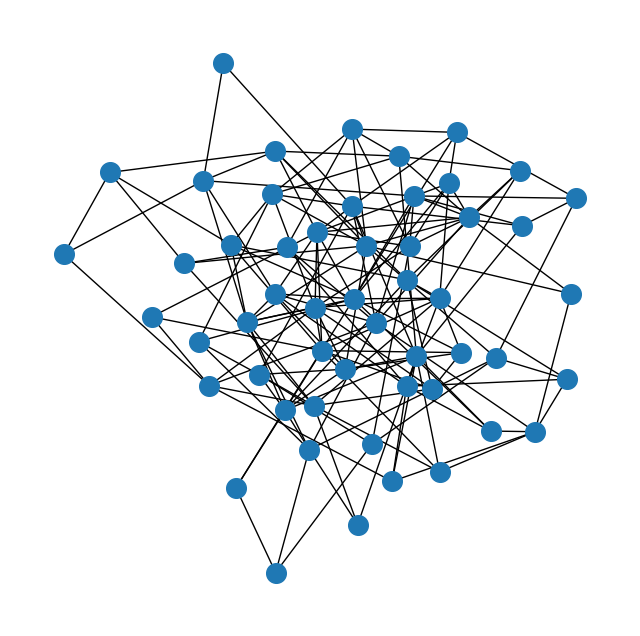

In [ ]:
# draw a grid graph
g = gen.graph_from_csv("random_406.csv")
pos = nx.circular_layout(g)
vis.visualise(g,file="../imgs/random.jpg")

In [ ]:
# create dataframe with data about the graphs
ids = []
types = []
all_num_nodes = []
all_num_edges = []
all_average_node_degree = []
all_edge_ratio = []
for graph in graphs:
    num_nodes = graph.number_of_nodes()
    num_edges = graph.number_of_edges()
    average_node_degree = (num_edges * 2) / num_nodes
    edge_ratio = num_edges / ((num_nodes*(num_nodes -1) / 2))
    ids.append(graph.graph["id"])
    types.append(graph.graph["type"])
    all_num_nodes.append(num_nodes)
    all_num_edges.append(num_edges)
    all_average_node_degree.append(average_node_degree)
    all_edge_ratio.append(edge_ratio)

graph_df = pd.DataFrame({
    "id" : ids,
    "type": types,
    "num_nodes": all_num_nodes, 
    "num_edges": all_num_edges, 
    "average_node_degree": all_average_node_degree,
    "edge_ratio": all_edge_ratio
    })

graph_df = graph_df.sort_values("id", ignore_index=True)
graph_df

,id,type,num_nodes,num_edges,average_node_degree,edge_ratio
0,0,random,210,1534,14.609524,0.069902
1,1,random,375,45246,241.312000,0.645219
2,2,random,450,48023,213.435556,0.475358
3,3,random,106,901,17.000000,0.161905
4,4,random,390,38206,195.928205,0.503671
...,...,...,...,...,...,...
995,995,grid,112,202,3.607143,0.032497
996,996,grid,2769,5428,3.920549,0.001416
997,997,grid,1122,2171,3.869875,0.003452
998,998,grid,9312,18431,3.958548,0.000425


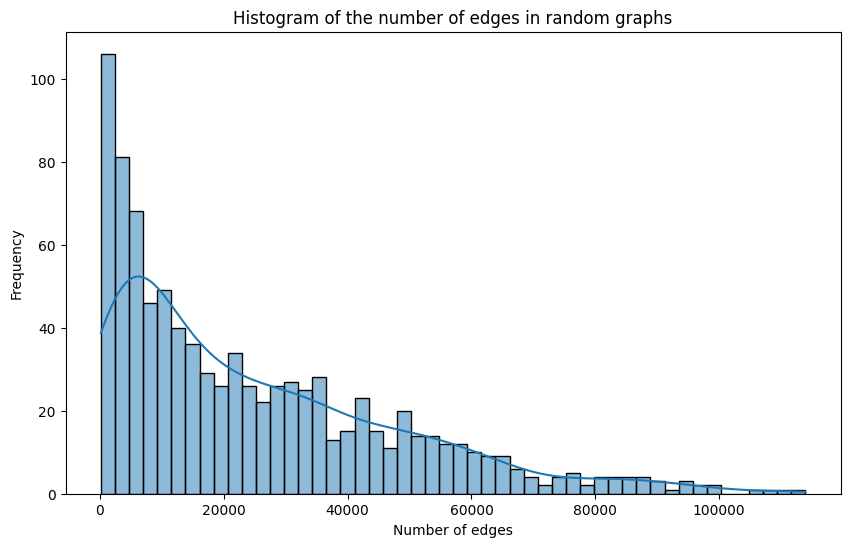

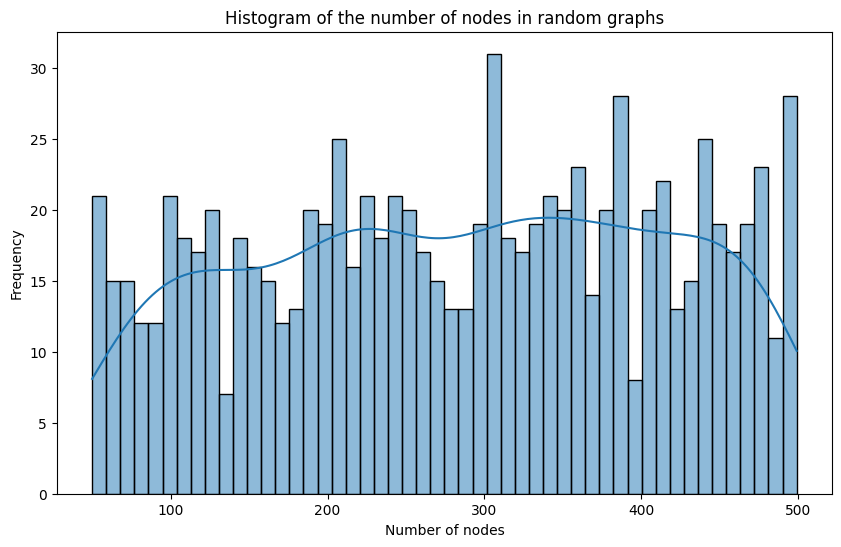

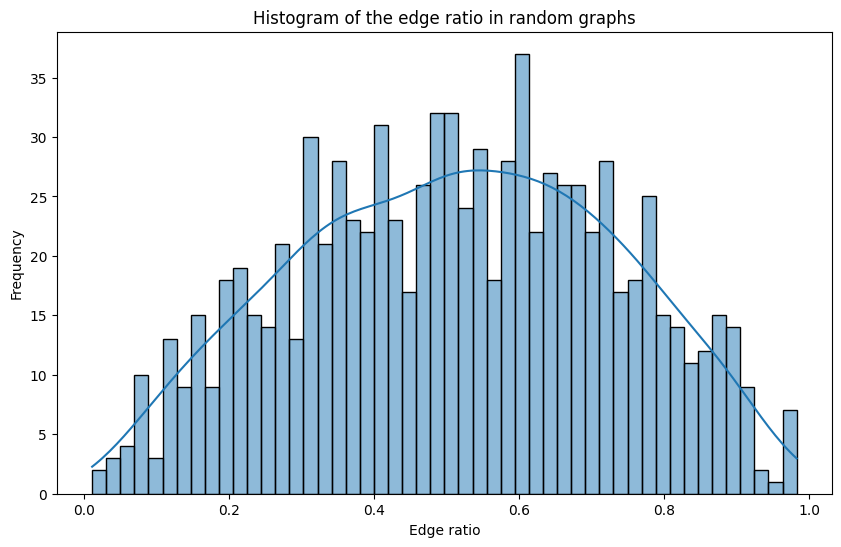

In [ ]:
# create histograms from the graph data
plt.figure(figsize=(10, 6))
sns.histplot(data=graph_df[graph_df['type']=="random"], x='num_edges', bins=50, kde=True)
plt.title(f'Histogram of the number of edges in random graphs')
plt.xlabel("Number of edges")
plt.ylabel('Frequency')
plt.savefig("../imgs/random_edge_hist.jpg")
plt.show()


# Plot histograms for string column 'type'
plt.figure(figsize=(10, 6))
sns.histplot(data=graph_df[graph_df['type']=="random"], x='num_nodes', bins=50, kde=True)
plt.title(f'Histogram of the number of nodes in random graphs')
plt.xlabel("Number of nodes")
plt.ylabel('Frequency')
plt.savefig("../imgs/random_node_hist.jpg")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=graph_df[graph_df['type']=="random"], x='edge_ratio', bins=50, kde=True)
plt.title(f'Histogram of the edge ratio in random graphs')
plt.xlabel("Edge ratio")
plt.ylabel('Frequency')
plt.savefig("../imgs/random_edge_ratio_hist.jpg")
plt.show()

In [ ]:
grouped_graph_df = graph_df.groupby("type").agg({"num_nodes":["mean", "min", "max"],"num_edges":["mean", "min", "max"],
                                                 "edge_ratio":["mean", "min", "max"],"average_node_degree":["mean", "min", "max"]}).reset_index()
grouped_graph_df

type    num_nodes                num_edges              edge_ratio  \
                  mean  min   max          mean  min     max       mean   
0    grid  2444.240000  112  9312   4788.280000  202   18431   0.004070   
1  random   283.471111   50   499  24862.302222  159  113925   0.512429   
2    star    75.500000   51   100     74.500000   50      99   0.027527   

                      average_node_degree                        
        min       max                mean       min         max  
0  0.000425  0.032497            3.857034  3.570588    3.958548  
1  0.011390  0.982945          145.551724  3.485342  470.764463  
2  0.020000  0.039216            1.972473  1.960784    1.980000

In [ ]:
grouped_graph_df.T.to_csv(f"{gen.GRAPH_FOLDER}/statistics.csv")

In [9]:
# visaulisation data
ids = []
types = []
num_iterations = []
gen_time = []
for graph in graphs:
    id = graph.graph['id']
    type = graph.graph['type']
    if type != "grid":
        pos_df = pd.read_csv(f"{gen.POS_FOLDER}/{type}_{id}.csv")
        num_iterations.append(len(pos_df))
        gen_time.append(pos_df["elapsed_time"].iloc[-1])
        ids.append(id)
        types.append(type)

pos_gen_df = pd.DataFrame({"id":ids,"type":types,"num_iterations": num_iterations, "gen_time": gen_time})

In [10]:
pos_gen_df['gen_time_per_iteration'] = pos_gen_df['gen_time'] / pos_gen_df['num_iterations']
pos_gen_df

,id,type,num_iterations,gen_time,gen_time_per_iteration
0,0,random,987,1771.570683,1.794904
1,1,random,983,19417.334557,19.753138
2,10,random,987,3484.037161,3.529926
3,100,random,980,29148.762226,29.743635
4,101,random,989,2507.824183,2.535717
...,...,...,...,...,...
945,945,star,985,340.312004,0.345494
946,946,star,987,267.338514,0.270860
947,947,star,986,368.232012,0.373460
948,948,star,985,344.819069,0.350070


In [15]:
pos_gen_df["num_iterations"].agg(['mean','max','min','std'])

mean    986.010526
max     995.000000
min     980.000000
std       3.940535
Name: num_iterations, dtype: float64

In [16]:
pos_gen_df["gen_time"].agg(['mean','max','min', 'std'])

mean     7738.930135
max     42998.585463
min       253.564119
std      7323.709899
Name: gen_time, dtype: float64

In [17]:
pos_gen_df["gen_time_per_iteration"].agg(['mean','max','min', 'std'])

mean     7.872116
max     43.786747
min      0.257164
std      7.468138
Name: gen_time_per_iteration, dtype: float64